
# Projeto Integrado de Deep Learning para QuantumFinance

## Objetivo
Desenvolver um modelo de Deep Learning capaz de decidir sobre a compra ou venda de ações específicas, com base nas tendências do mercado nos últimos 15 dias.

## Dados
Os dados consistem em séries temporais dos preços de fechamento (e valores suavizados) para as ações selecionadas, com rótulos indicando momentos de compra ou venda.

## Estratégia de Desenvolvimento
O projeto será desenvolvido em etapas, começando com a análise exploratória dos dados, seguido pela seleção, implementação e avaliação de modelos de Deep Learning.

## Próximos Passos
1. Análise exploratória dos dados para entender suas características e prepará-los para o treinamento de modelos.
2. Desenvolvimento e treinamento de modelos utilizando TensorFlow, começando com redes neurais convolucionais 1D (CNN 1D) e redes neurais recorrentes (RNN).
3. Avaliação dos modelos utilizando os dados de teste e métricas como acurácia, matriz de confusão, precisão e recall.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

EDA para treinoVALE3.csv:
Descrição dos dados:
        Unnamed: 0        Close  Smoothed_Close        Label  \
count  4808.000000  4808.000000     4808.000000  4808.000000   
mean   2404.500000    14.771682       14.715974    -0.129784   
std    1388.094377     9.217010        9.165915     0.991645   
min       1.000000     1.295628        1.442017    -1.000000   
25%    1202.750000     6.469090        6.401913    -1.000000   
50%    2404.500000    14.931363       14.807120    -1.000000   
75%    3606.250000    21.183798       21.286503     1.000000   
max    4808.000000    42.428528       39.779267     1.000000   

       Past_1_Days_Close  Past_2_Days_Close  Past_3_Days_Close  \
count        4808.000000        4808.000000        4808.000000   
mean           14.765370          14.759083          14.753028   
std             9.215504           9.214017           9.212938   
min             1.295628           1.295628           1.295628   
25%             6.463375           6.459086   

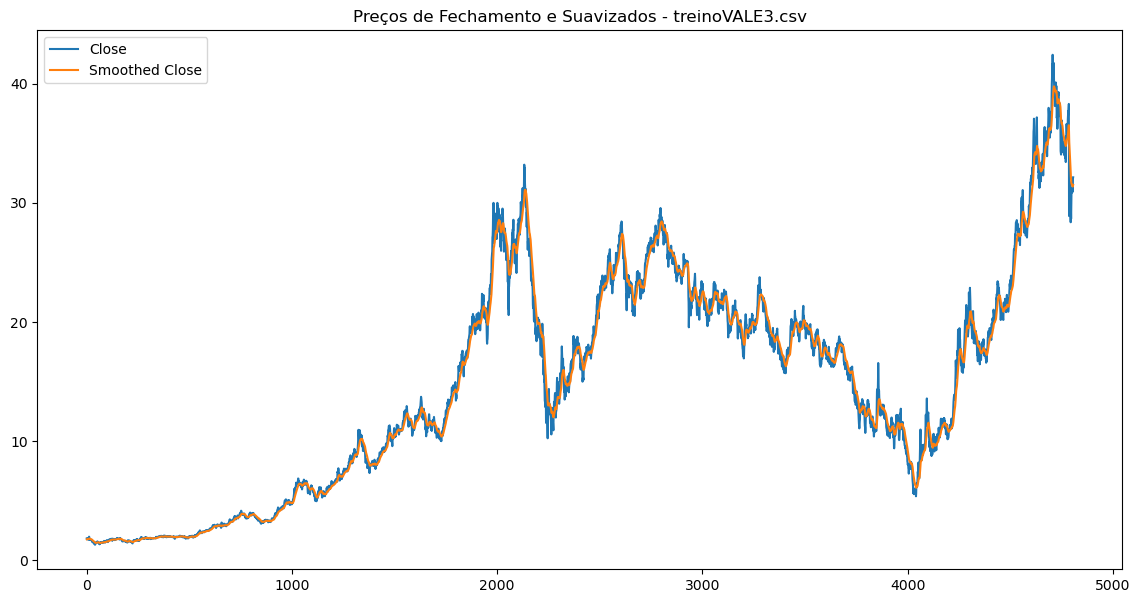

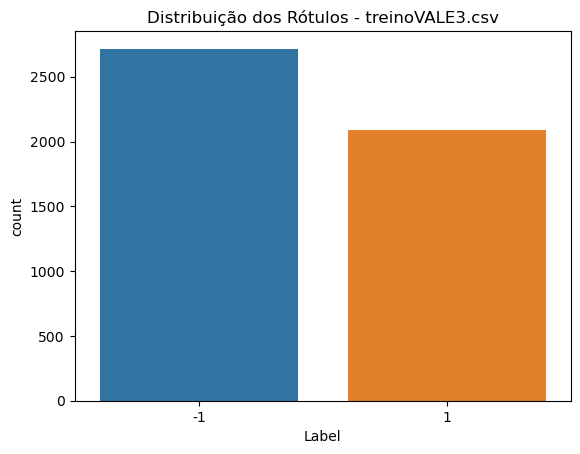

EDA para testeVALE3.csv:
Descrição dos dados:
        Unnamed: 0        Close  Smoothed_Close        Label  \
count  1203.000000  1203.000000     1203.000000  1203.000000   
mean   5410.000000    59.398599       59.074431     0.000831   
std     347.420495    19.076230       18.956733     1.000416   
min    4809.000000    23.877026       28.724406    -1.000000   
25%    5109.500000    37.555548       36.915155    -1.000000   
50%    5410.000000    64.901688       65.020908     1.000000   
75%    5710.500000    74.248028       73.463206     1.000000   
max    6011.000000    92.170753       88.794687     1.000000   

       Past_1_Days_Close  Past_2_Days_Close  Past_3_Days_Close  \
count        1203.000000        1203.000000        1203.000000   
mean           59.361145          59.323450          59.285457   
std            19.085481          19.094602          19.105546   
min            23.877026          23.877026          23.877026   
25%            37.534540          37.468019    

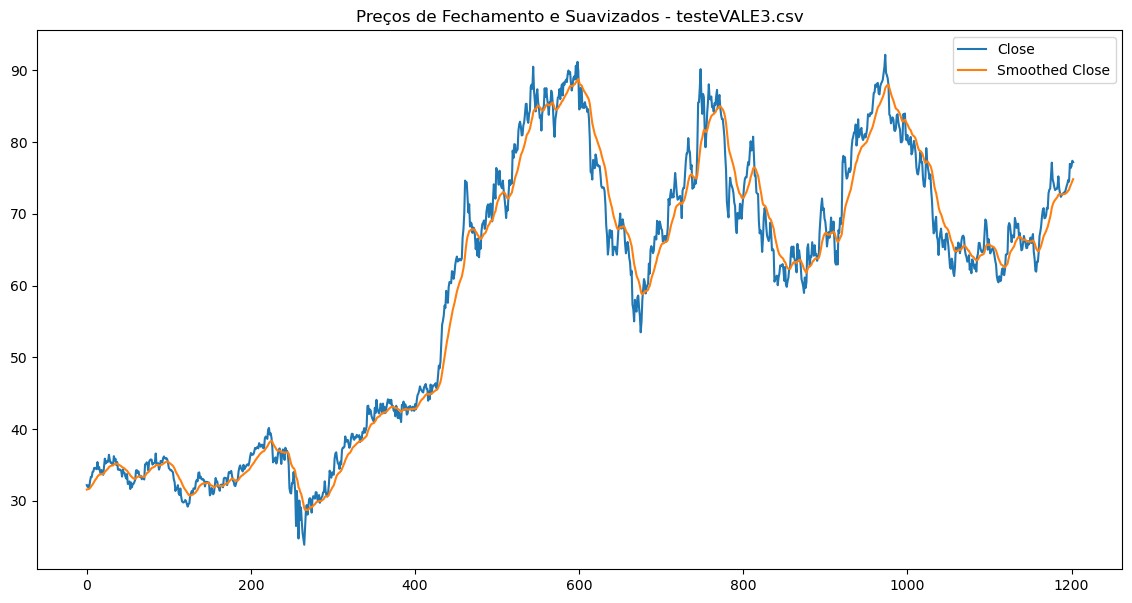

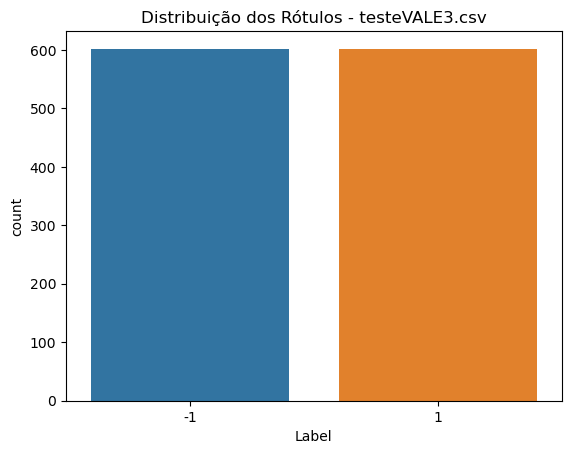

EDA para treinoPETR4.csv:
Descrição dos dados:
        Unnamed: 0        Close  Smoothed_Close        Label  \
count  4808.000000  4808.000000     4808.000000  4808.000000   
mean   2404.500000     5.126396        5.111402    -0.103993   
std    1388.094377     2.810534        2.790427     0.994681   
min       1.000000     1.080224        1.200894    -1.000000   
25%    1202.750000     2.523248        2.533339    -1.000000   
50%    2404.500000     5.331852        5.349307    -1.000000   
75%    3606.250000     6.990364        6.965855     1.000000   
max    4808.000000    14.551721       13.432679     1.000000   

       Past_1_Days_Close  Past_2_Days_Close  Past_3_Days_Close  \
count        4808.000000        4808.000000        4808.000000   
mean            5.124685           5.122948           5.121191   
std             2.810369           2.810144           2.809884   
min             1.080224           1.080224           1.080224   
25%             2.519004           2.518208   

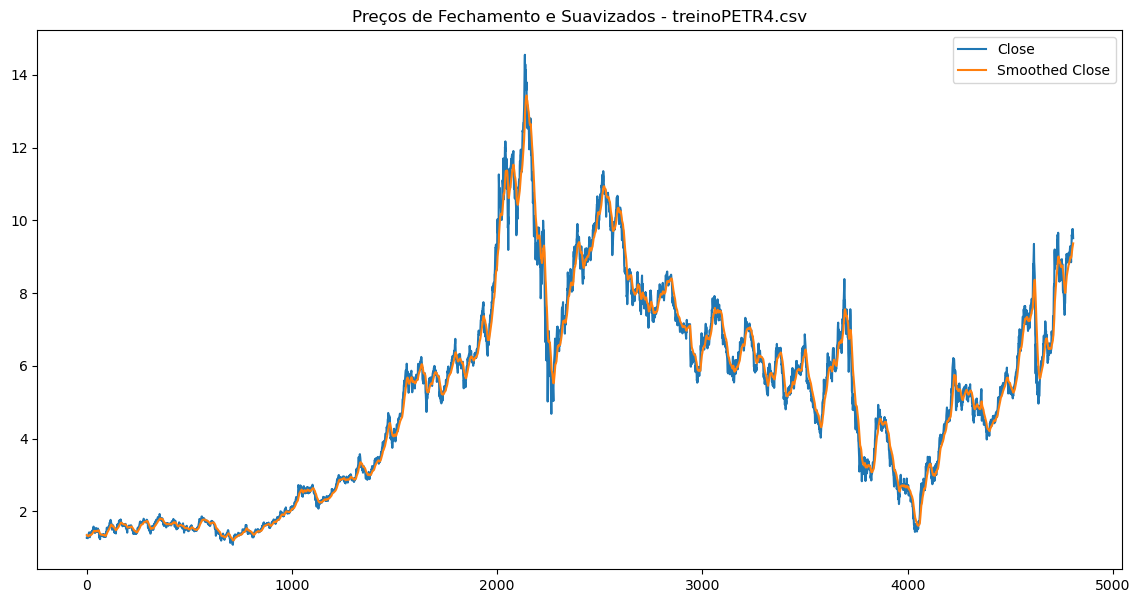

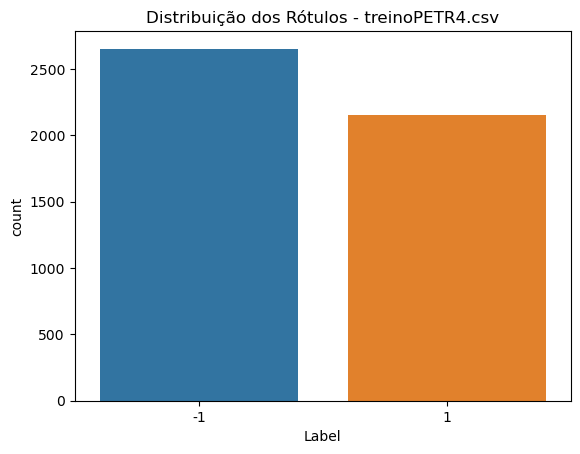

EDA para testePETR4.csv:
Descrição dos dados:
        Unnamed: 0        Close  Smoothed_Close        Label  \
count  1203.000000  1203.000000     1203.000000  1203.000000   
mean   5410.000000    14.715491       14.516908     0.034081   
std     347.420495     7.657101        7.394220     0.999835   
min    4809.000000     4.155138        5.735582    -1.000000   
25%    5109.500000     9.528268        9.488678    -1.000000   
50%    5410.000000    10.966625       10.843625     1.000000   
75%    5710.500000    18.860652       18.998106     1.000000   
max    6011.000000    37.360001       35.910318     1.000000   

       Past_1_Days_Close  Past_2_Days_Close  Past_3_Days_Close  \
count        1203.000000        1203.000000        1203.000000   
mean           14.692441          14.669419          14.646501   
std             7.630931           7.604219           7.577365   
min             4.155138           4.155138           4.155138   
25%             9.522925           9.522925    

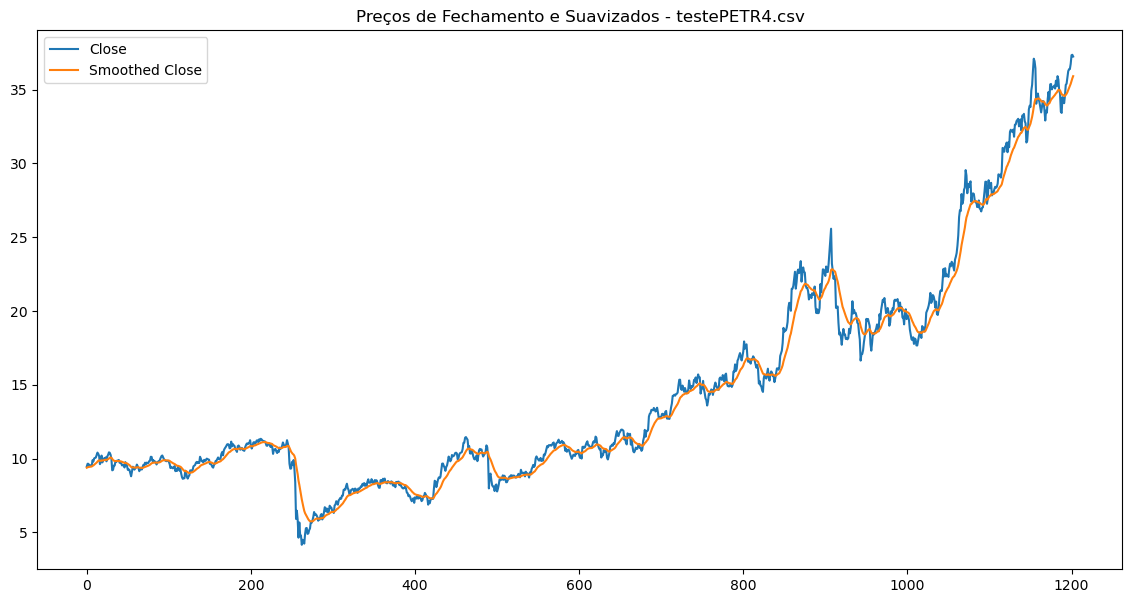

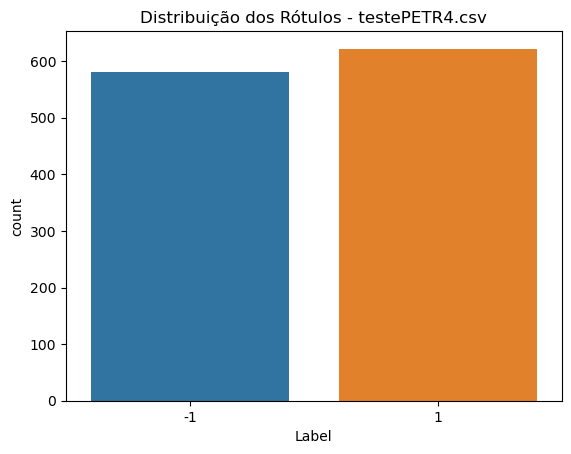

EDA para treinoBBAS3.csv:
Descrição dos dados:
        Unnamed: 0        Close  Smoothed_Close        Label  \
count  4735.000000  4735.000000     4735.000000  4735.000000   
mean   2368.000000    10.170651       10.100295    -0.099050   
std    1367.021092     7.438277        7.315907     0.995188   
min       1.000000     0.720744        0.761192    -1.000000   
25%    1184.500000     3.770148        3.808185    -1.000000   
50%    2368.000000    10.732536       10.879908    -1.000000   
75%    3551.500000    13.233261       13.129158     1.000000   
max    4735.000000    40.156639       38.947137     1.000000   

       Past_1_Days_Close  Past_2_Days_Close  Past_3_Days_Close  \
count        4735.000000        4735.000000        4735.000000   
mean           10.163374          10.156147          10.148493   
std             7.430295           7.422481           7.413137   
min             0.720744           0.720744           0.720744   
25%             3.767527           3.751146   

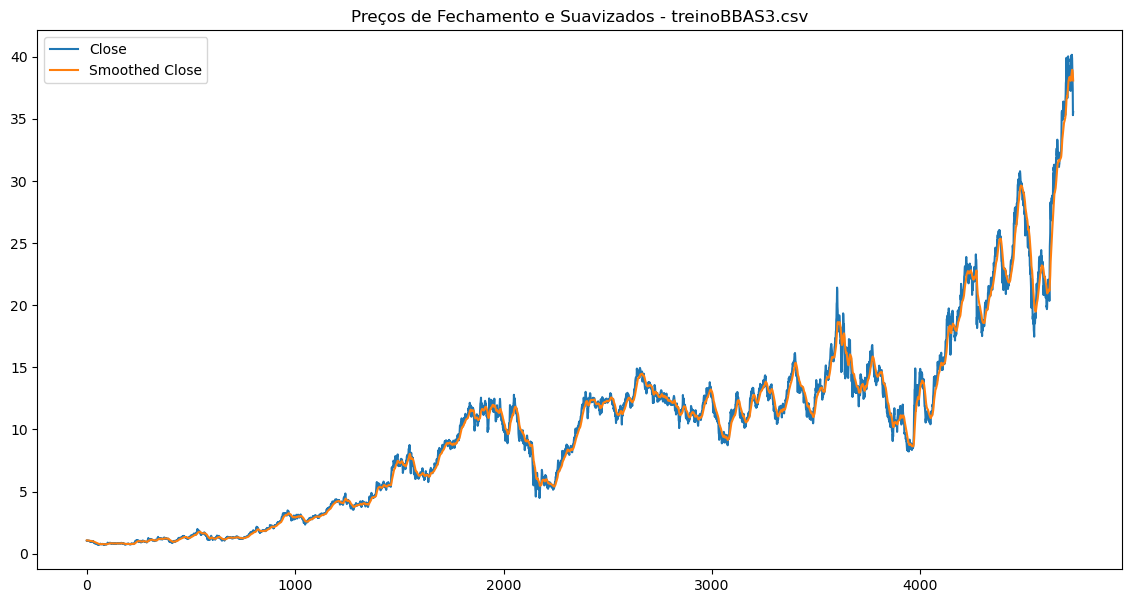

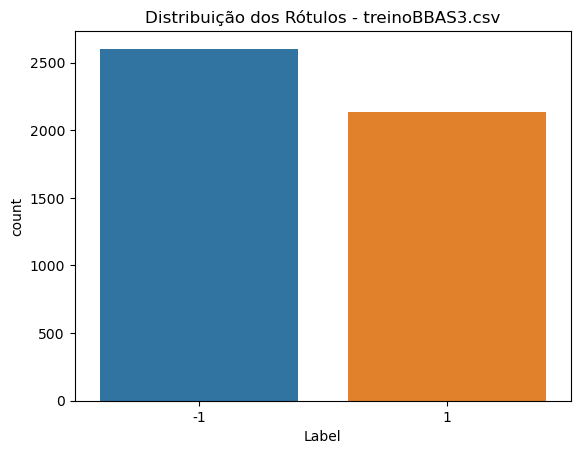

EDA para testeBBAS3.csv:
Descrição dos dados:
        Unnamed: 0        Close  Smoothed_Close        Label  \
count  1185.000000  1185.000000     1185.000000  1185.000000   
mean   5328.000000    33.105128       32.985142    -0.162869   
std     342.224342     7.843706        7.478627     0.987064   
min    4736.000000    17.261238       21.297557    -1.000000   
25%    5032.000000    26.445494       26.208256    -1.000000   
50%    5328.000000    31.736732       31.576388    -1.000000   
75%    5624.000000    37.555946       37.054298     1.000000   
max    5920.000000    55.389999       53.886008     1.000000   

       Past_1_Days_Close  Past_2_Days_Close  Past_3_Days_Close  \
count        1185.000000        1185.000000        1185.000000   
mean           33.088384          33.071876          33.057012   
std             7.817228           7.791826           7.766835   
min            17.261238          17.261238          17.261238   
25%            26.445494          26.445494    

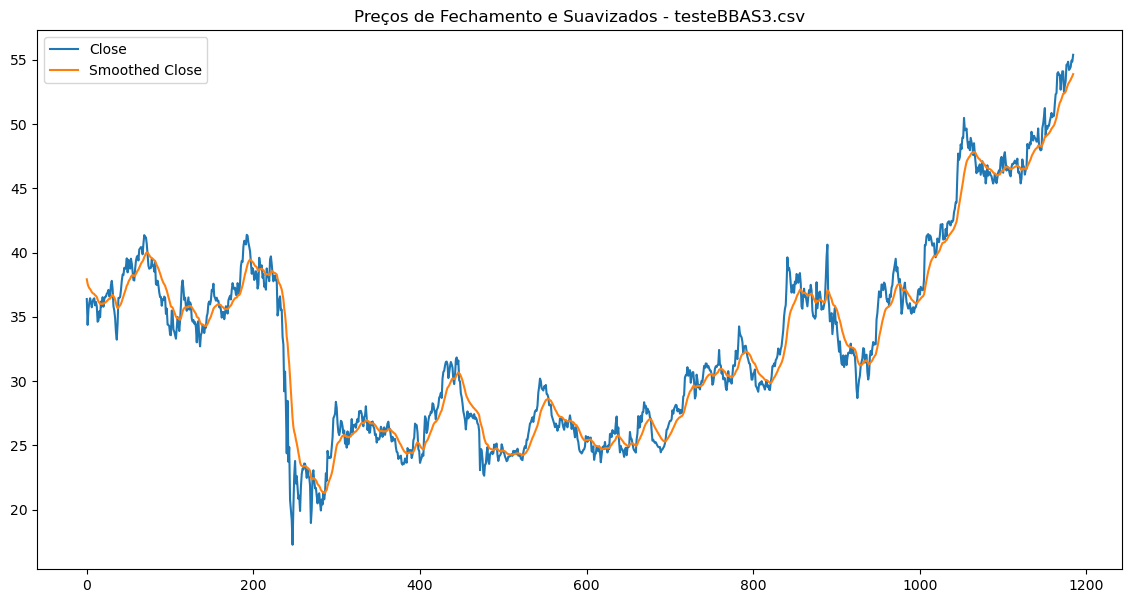

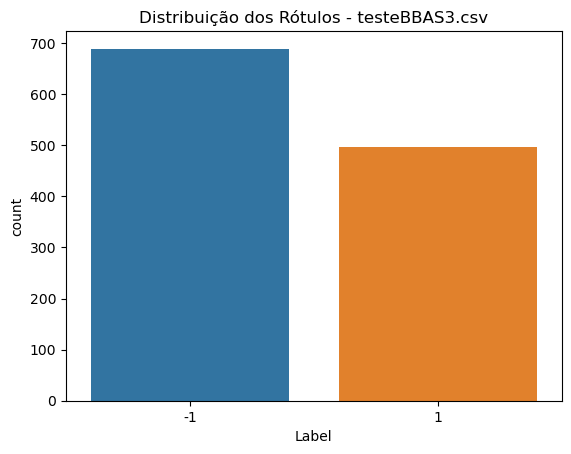

EDA para treinoCSNA3.csv:
Descrição dos dados:
        Unnamed: 0        Close  Smoothed_Close        Label  \
count  4743.000000  4743.000000     4743.000000  4743.000000   
mean   2372.000000     5.516489        5.501408    -0.119545   
std    1369.330493     3.691260        3.663616     0.992934   
min       1.000000     0.574565        0.634654    -1.000000   
25%    1186.500000     2.911187        2.932332    -1.000000   
50%    2372.000000     4.904093        4.955101    -1.000000   
75%    3557.500000     6.975218        6.964744     1.000000   
max    4743.000000    17.656988       16.677130     1.000000   

       Past_1_Days_Close  Past_2_Days_Close  Past_3_Days_Close  \
count        4743.000000        4743.000000        4743.000000   
mean            5.514680           5.512805           5.510895   
std             3.691186           3.690977           3.690697   
min             0.574565           0.574565           0.574565   
25%             2.909560           2.907685   

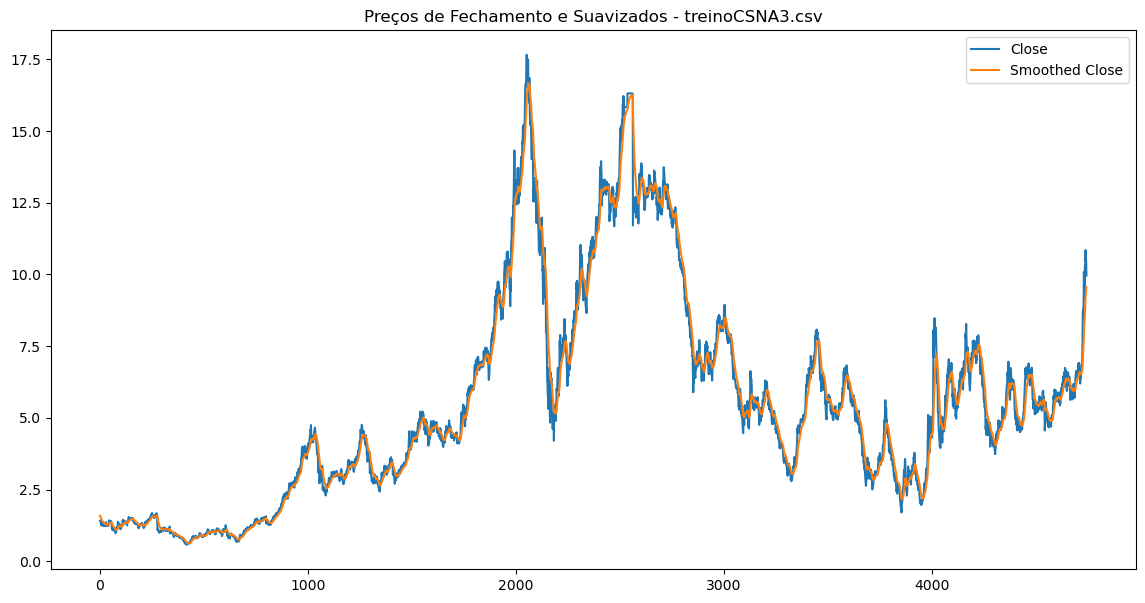

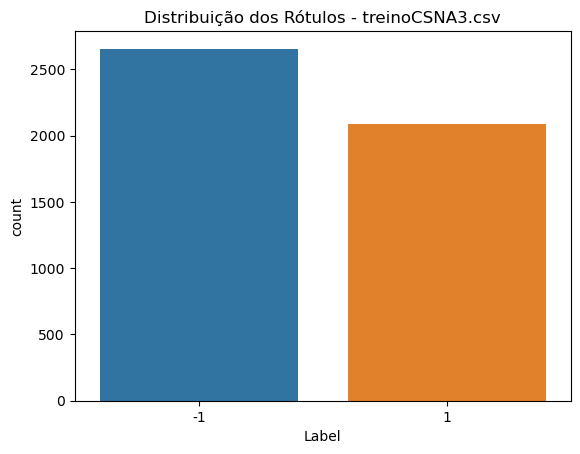

EDA para testeCSNA3.csv:
Descrição dos dados:
        Unnamed: 0        Close  Smoothed_Close        Label  \
count  1186.000000  1186.000000     1186.000000  1186.000000   
mean   5336.500000    15.680634       15.616641    -0.160202   
std     342.513017     7.522962        7.421667     0.987501   
min    4744.000000     4.325818        5.473158    -1.000000   
25%    5040.250000    10.726367       10.680296    -1.000000   
50%    5336.500000    12.553173       12.406479    -1.000000   
75%    5632.750000    19.109073       18.938324     1.000000   
max    5929.000000    39.173981       36.485040     1.000000   

       Past_1_Days_Close  Past_2_Days_Close  Past_3_Days_Close  \
count        1186.000000        1186.000000        1186.000000   
mean           15.672454          15.664748          15.657348   
std             7.523906           7.524653           7.525331   
min             4.325818           4.325818           4.325818   
25%            10.711797          10.704224    

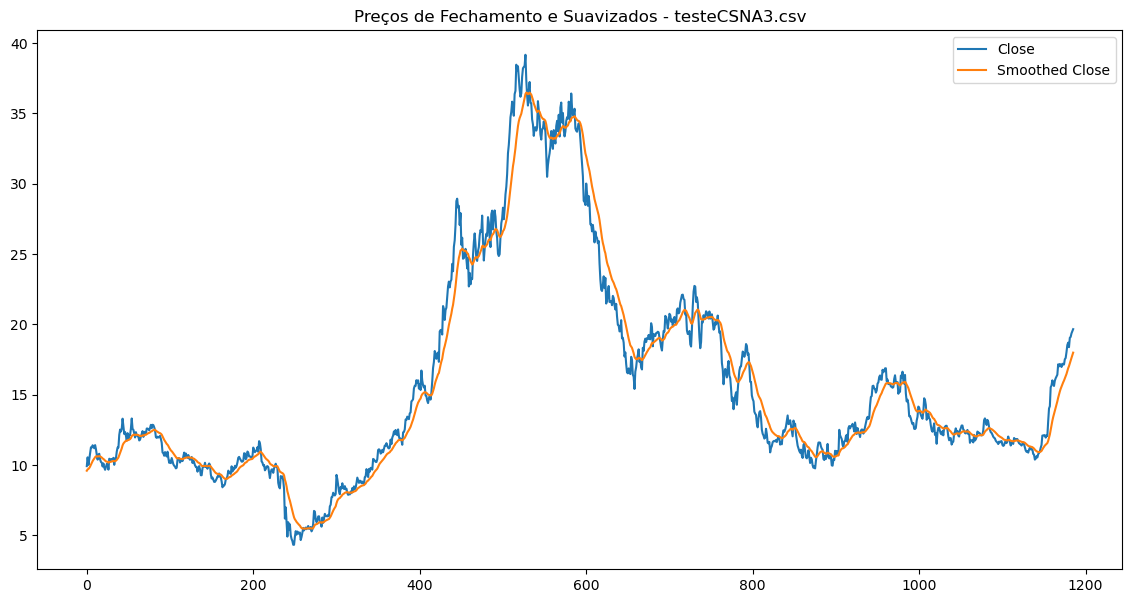

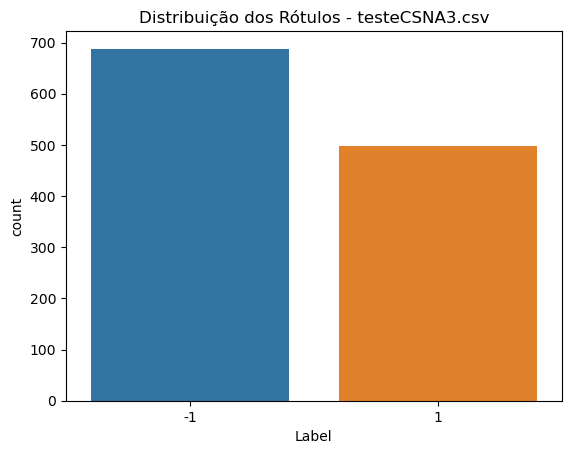

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Definir o caminho para a pasta contendo os arquivos CSV
pasta_acoes = 'Acoes/'

# Criar listas com os nomes dos arquivos CSV das ações para treino e teste
acoes = ['VALE3', 'PETR4', 'BBAS3', 'CSNA3']
tipos = ['treino', 'teste']

# Dicionário para armazenar os DataFrames processados
dfs_processados = {}

# Iterar sobre cada ação e tipo (treino ou teste)
for acao in acoes:
    for tipo in tipos:
        nome_arquivo = f'{tipo}{acao}.csv'
        caminho_completo = os.path.join(pasta_acoes, nome_arquivo)

        try:
            # Carregar os dados
            df = pd.read_csv(caminho_completo)
            dfs_processados[nome_arquivo] = df  # Armazenar o DataFrame

            # EDA básica
            print(f"EDA para {nome_arquivo}:")
            print(f"Descrição dos dados:\n{df.describe()}\n")
            print(f"Contagem de valores NaN por coluna:\n{df.isna().sum()}\n")
            print(f"Contagem dos rótulos:\n{df['Label'].value_counts()}\n")

            # Visualizações
            plt.figure(figsize=(14, 7))
            plt.plot(df['Close'], label='Close')
            plt.plot(df['Smoothed_Close'], label='Smoothed Close')
            plt.title(f'Preços de Fechamento e Suavizados - {nome_arquivo}')
            plt.legend()
            plt.show()

            sns.countplot(x='Label', data=df)
            plt.title(f'Distribuição dos Rótulos - {nome_arquivo}')
            plt.show()

        except Exception as e:
            print(f"Erro ao carregar o arquivo {nome_arquivo}: {e}\n")


In [3]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Dropout, MaxPooling1D, Flatten, Input
from tensorflow.keras.utils import to_categorical
from collections import defaultdict
import numpy as np

# Normalizador para as features
scaler = StandardScaler()

# Dicionário para armazenar os modelos e históricos
modelos = {}
historicos = {}

# Função para converter rótulos em formato categórico
def converter_para_categorico(y):
    if y.min() == -1:  # Se os rótulos forem -1 e 1
        y = (y + 1) // 2  # Converter rótulos para 0 e 1
    return to_categorical(y)

# Processar e treinar modelos para cada ação
for chave, df in dfs_processados.items():
    # Separar em features e rótulos
    X = df.drop(['Date', 'Close', 'Smoothed_Close', 'Label'], axis=1)
    y = df['Label']

    # Normalizar as features
    X = scaler.fit_transform(X)

    # Converter os rótulos para formato categórico
    y = converter_para_categorico(y)

    # Reshape para o formato que o Keras espera: [samples, time steps, features]
    X_reshaped = np.expand_dims(X, axis=2)

    # Definir a arquitetura do modelo CNN 1D
    model_cnn = Sequential([
        Input(shape=(X_reshaped.shape[1], 1)),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ])

    # Definir a arquitetura do modelo RNN
    model_rnn = Sequential([
        Input(shape=(X_reshaped.shape[1], 1)),
        LSTM(50, return_sequences=True),
        LSTM(50),
        Dense(50, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ])

    # Compilar os modelos
    model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Treinar os modelos
    # Suponha que temos 'epocas' e 'batch_size' definidos
    epocas = 16
    batch_size = 128
    historico_cnn = model_cnn.fit(X_reshaped, y, epochs=epocas, batch_size=batch_size, verbose=1)
    historico_rnn = model_rnn.fit(X_reshaped, y, epochs=epocas, batch_size=batch_size, verbose=1)

    # Armazenar os modelos e históricos
    modelos[f'CNN_{chave}'] = model_cnn
    modelos[f'RNN_{chave}'] = model_rnn
    historicos[f'CNN_{chave}_historico'] = historico_cnn
    historicos[f'RNN_{chave}_historico'] = historico_rnn




Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5657 - loss: 0.6801 
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 0.6312
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7127 - loss: 0.5695
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - loss: 0.5377
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7524 - loss: 0.4965
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7717 - loss: 0.4809
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7482 - loss: 0.4810
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7484 - loss: 0.4767
Epoch 9/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7659 - loss: 0.4665
Epoch 10/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 0.4486
Epoch 11/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.4334
Epoch 12/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7751 - l

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5696 - loss: 0.6809 - val_accuracy: 0.5665 - val_loss: 0.6935
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - loss: 0.5984 - val_accuracy: 0.7443 - val_loss: 0.5171
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7207 - loss: 0.5361 - val_accuracy: 0.7443 - val_loss: 0.5580
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7323 - loss: 0.5202 - val_accuracy: 0.7568 - val_loss: 0.5603
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.4921 - val_accuracy: 0.7204 - val_loss: 0.7386
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7356 - loss: 0.5034 - val_accuracy: 0.7349 - val_loss: 0.6972
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.4642 - val_accuracy: 0.7599 - val_loss: 0.6592
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7609 - loss: 0.4549 - val_accuracy: 0.

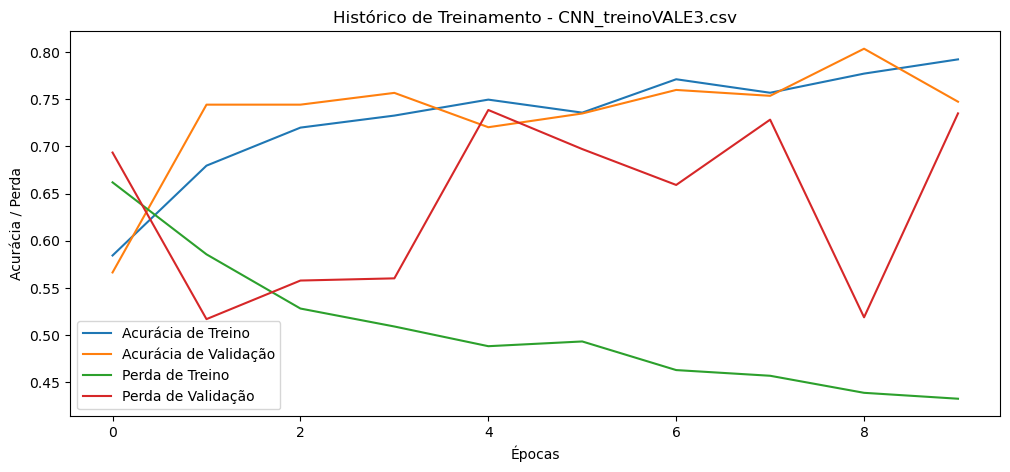

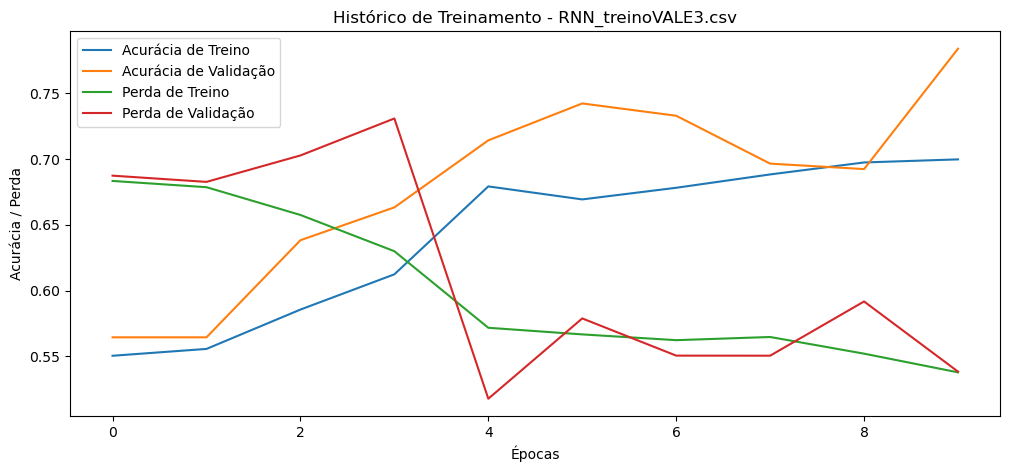

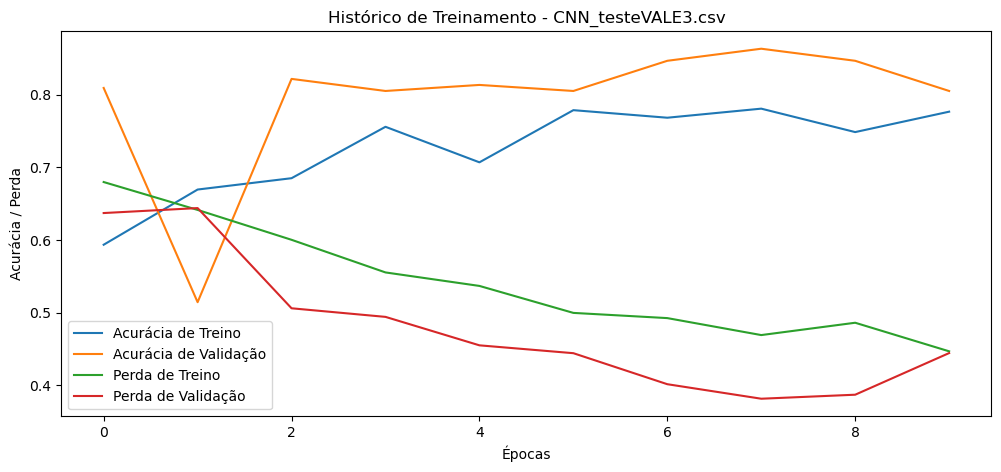

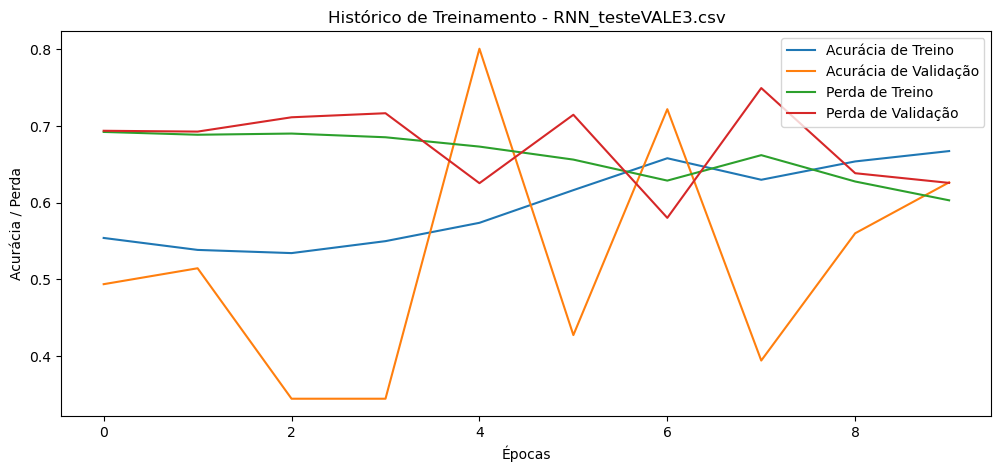

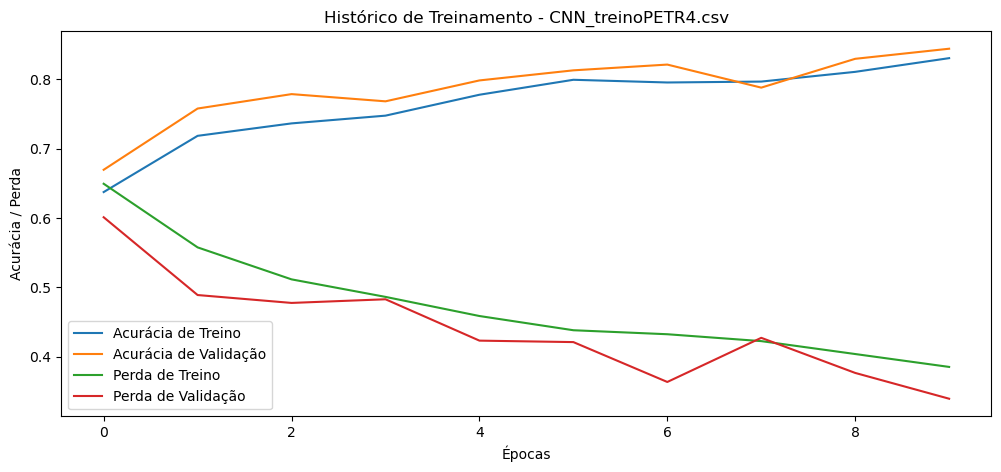

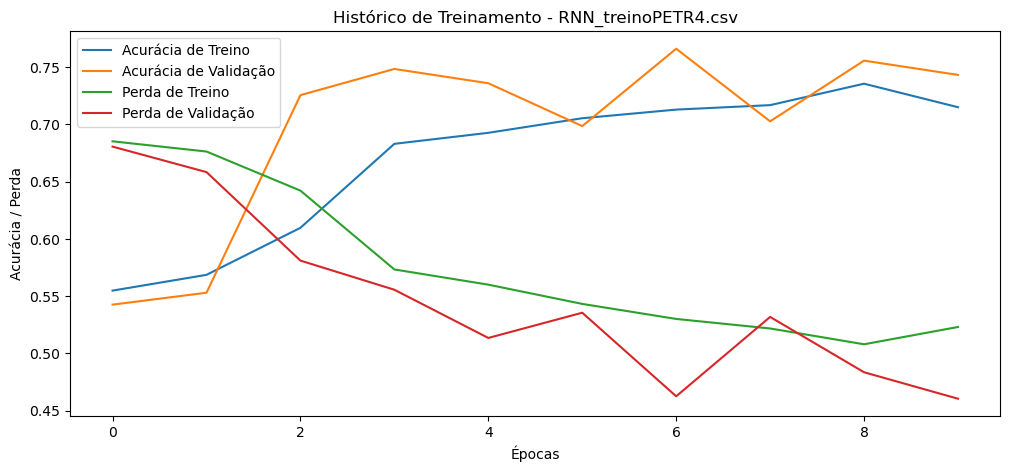

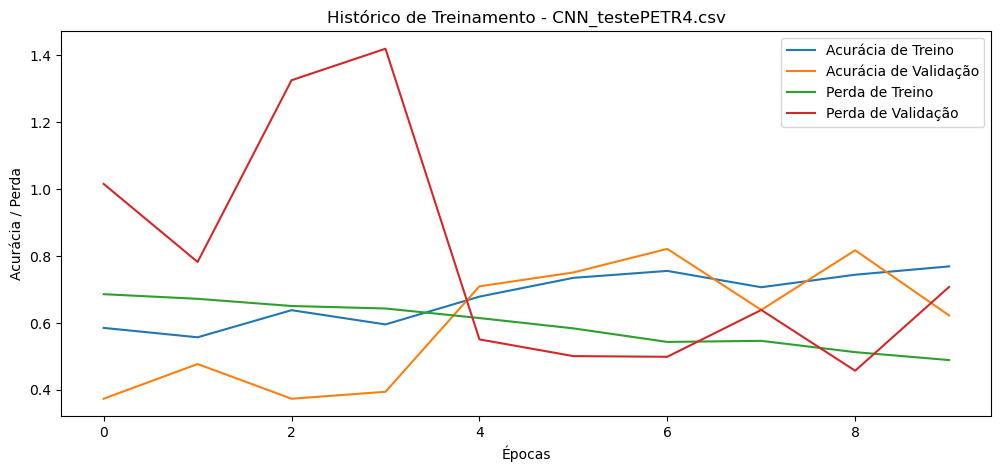

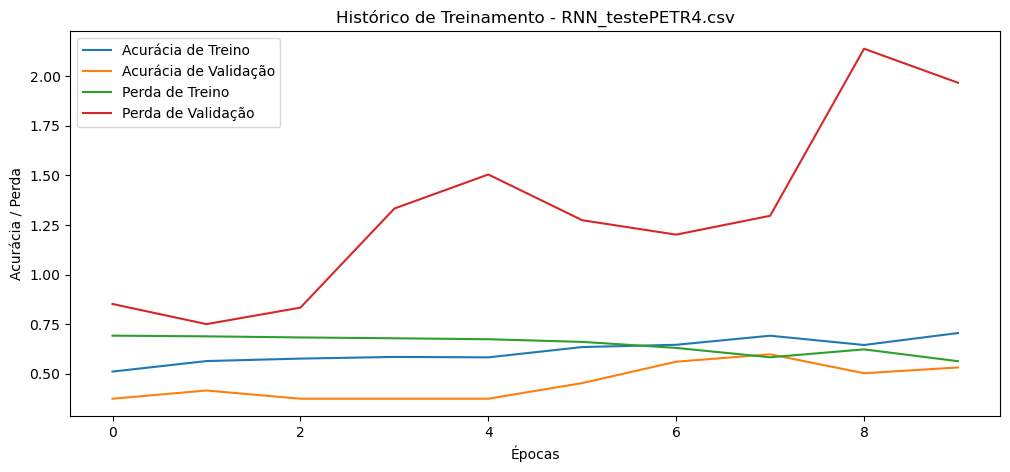

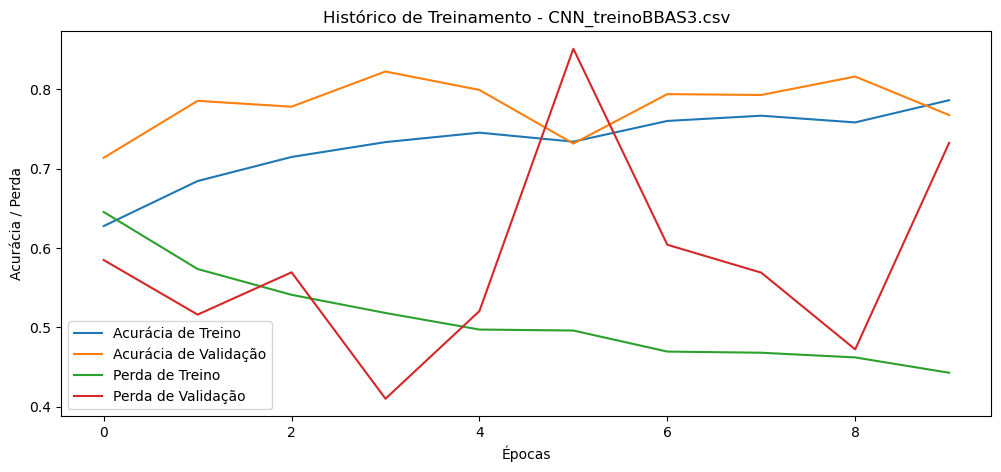

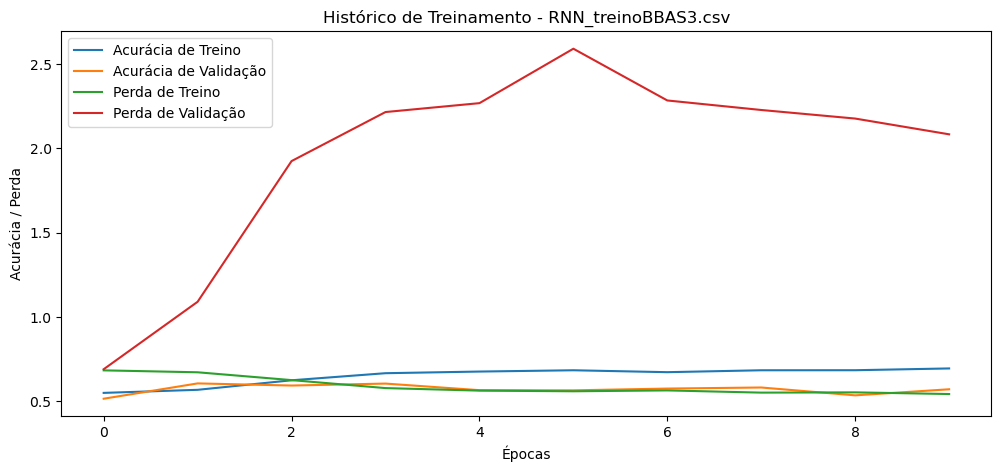

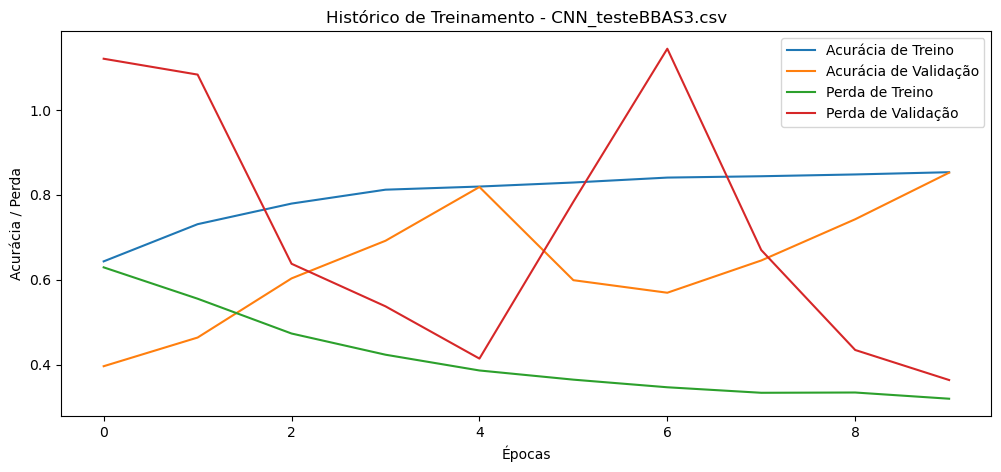

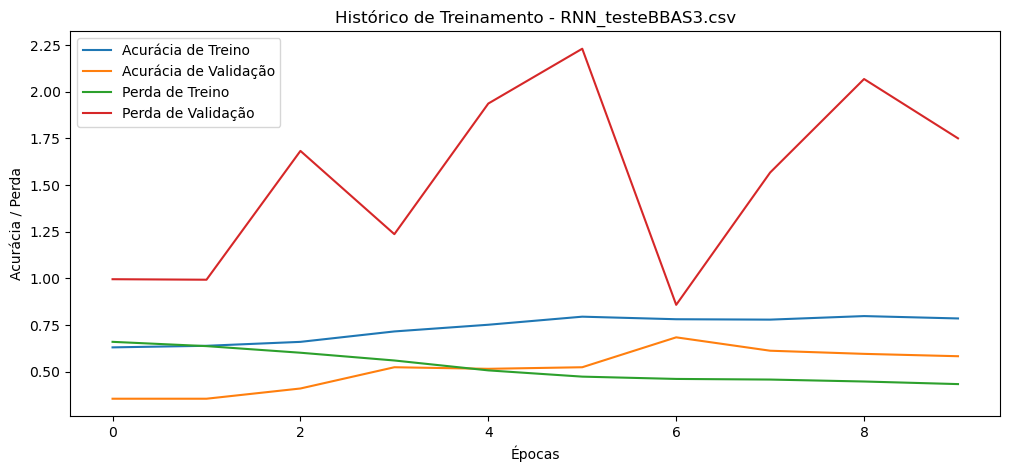

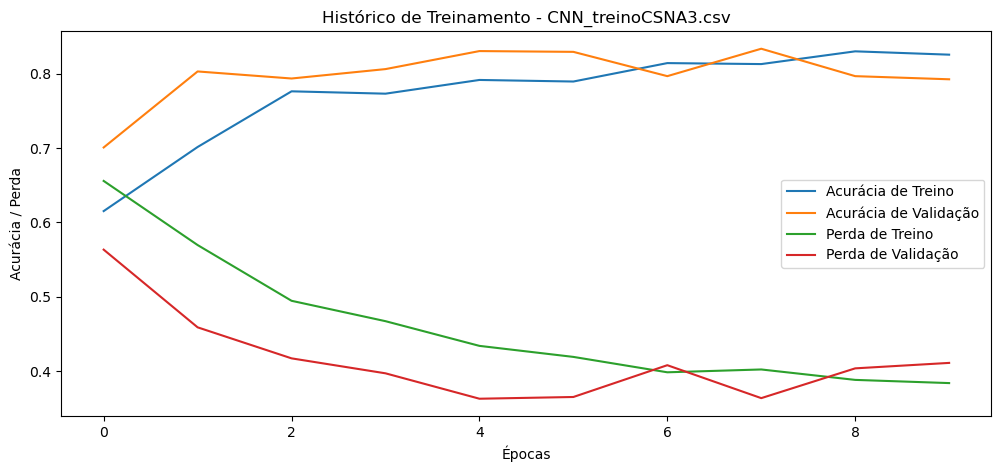

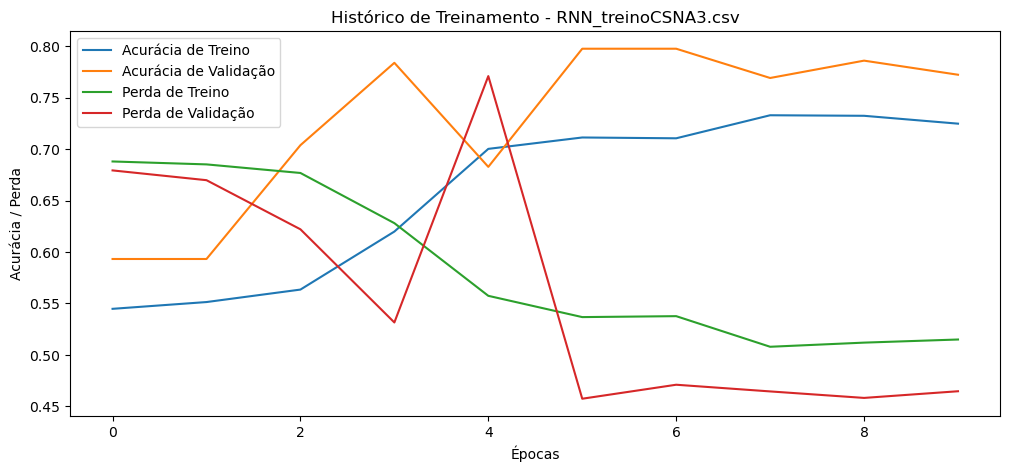

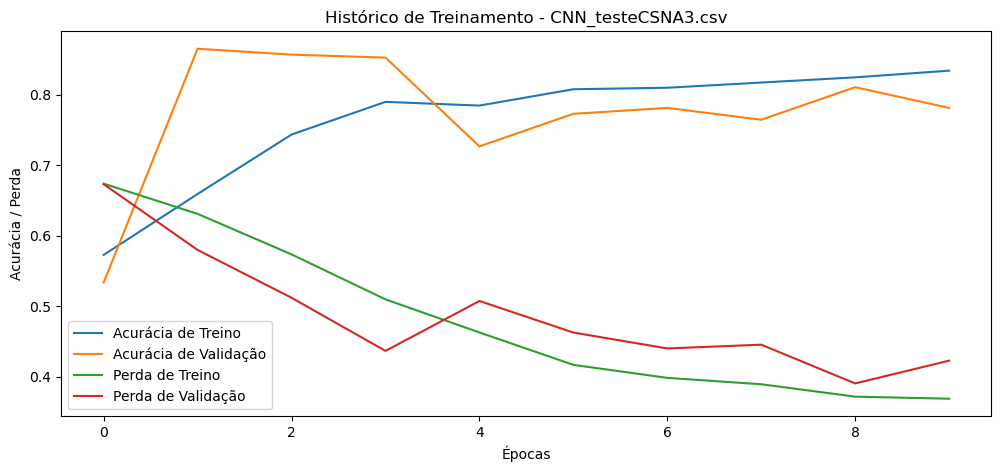

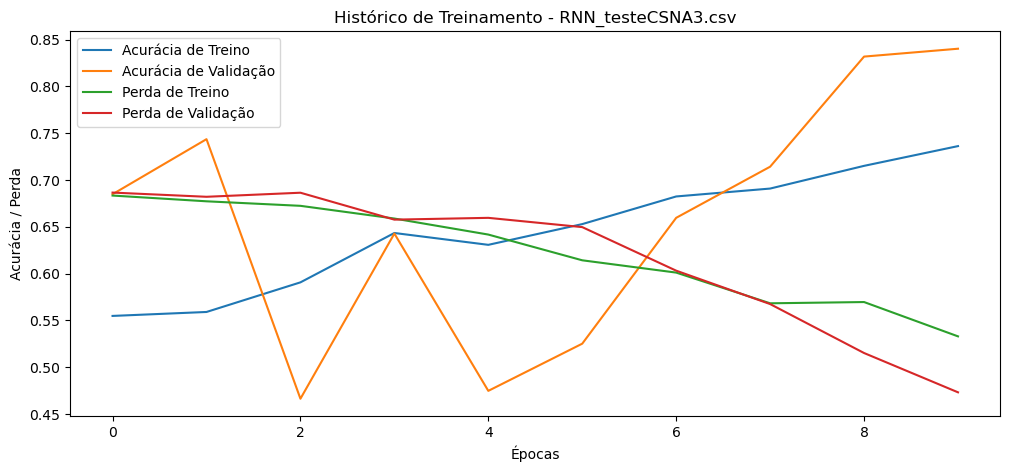

In [4]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Normalizador para as features
scaler = StandardScaler()

# Dicionário para armazenar os modelos e históricos
modelos = {}
historicos = {}

# Função para converter rótulos em formato categórico
def converter_para_categorico(y):
    if y.min() == -1:  # Se os rótulos forem -1 e 1
        y = (y + 1) // 2  # Converter rótulos para 0 e 1
    return to_categorical(y)

# Processar e treinar modelos para cada ação
for chave, df in dfs_processados.items():
    # Separar em features e rótulos
    X = df.drop(['Date', 'Close', 'Smoothed_Close', 'Label'], axis=1)
    y = df['Label']

    # Normalizar as features
    X = scaler.fit_transform(X)

    # Converter os rótulos para formato categórico
    y = converter_para_categorico(y)

    # Reshape para o formato que o Keras espera: [samples, time steps, features]
    X_reshaped = np.expand_dims(X, axis=2)

    # Definir a arquitetura do modelo CNN 1D
    model_cnn = Sequential([
        Input(shape=(X_reshaped.shape[1], 1)),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ])

    # Definir a arquitetura do modelo RNN
    model_rnn = Sequential([
        Input(shape=(X_reshaped.shape[1], 1)),
        LSTM(50, return_sequences=True),
        LSTM(50),
        Dense(50, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ])

    # Compilar os modelos
    model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Treinar os modelos
    epocas = 10
    batch_size = 32
    historico_cnn = model_cnn.fit(X_reshaped, y, epochs=epocas, batch_size=batch_size, validation_split=0.2, verbose=1)
    historico_rnn = model_rnn.fit(X_reshaped, y, epochs=epocas, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Armazenar os modelos e históricos
    modelos[f'CNN_{chave}'] = model_cnn
    modelos[f'RNN_{chave}'] = model_rnn
    historicos[f'CNN_{chave}'] = historico_cnn
    historicos[f'RNN_{chave}'] = historico_rnn

# Função para plotar histórico de treinamento
def plotar_historico(historico, titulo):
    plt.figure(figsize=(12, 5))
    plt.plot(historico.history['accuracy'], label='Acurácia de Treino')
    if 'val_accuracy' in historico.history:
        plt.plot(historico.history['val_accuracy'], label='Acurácia de Validação')
    plt.plot(historico.history['loss'], label='Perda de Treino')
    if 'val_loss' in historico.history:
        plt.plot(historico.history['val_loss'], label='Perda de Validação')
    plt.title(titulo)
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia / Perda')
    plt.legend()
    plt.show()

# Plotar o histórico para cada modelo treinado
for chave, historico in historicos.items():
    plotar_historico(historico, f"Histórico de Treinamento - {chave}")


CNN_treinoVALE3.csv -> Acurácia: 81.88%
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Relatório de Classificação para CNN_treinoVALE3.csv:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       601
           1       0.89      0.72      0.80       602

    accuracy                           0.82      1203
   macro avg       0.83      0.82      0.82      1203
weighted avg       0.83      0.82      0.82      1203


RNN_treinoVALE3.csv -> Acurácia: 49.96%
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Relatório de Classificação para RNN_treinoVALE3.csv:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       601
           1       0.50      0.00      0.01       602

    accuracy                           0.50      1203
   macro avg       0.50      0.50      0.34      1203
weighted avg       0.50      0.50      0.34      1203


CNN_testeVALE3.csv -> Acurácia: 64.26%
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\arauj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arauj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arauj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Relatório de Classificação para CNN_treinoPETR4.csv:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       581
           1       0.86      0.62      0.72       622

    accuracy                           0.75      1203
   macro avg       0.77      0.76      0.75      1203
weighted avg       0.78      0.75      0.75      1203


RNN_treinoPETR4.csv -> Acurácia: 64.34%
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Relatório de Classificação para RNN_treinoPETR4.csv:
               precision    recall  f1-score   support

           0       0.61      0.74      0.67       581
           1       0.70      0.55      0.61       622

    accuracy                           0.64      1203
   macro avg       0.65      0.65      0.64      1203
weighted avg       0.65      0.64      0.64      1203


CNN_testePETR4.csv -> Acurácia: 78.89%
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Relatório de Classificação para CNN_test

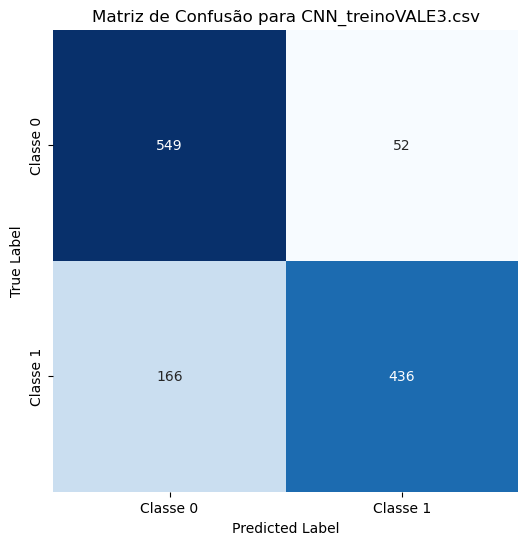

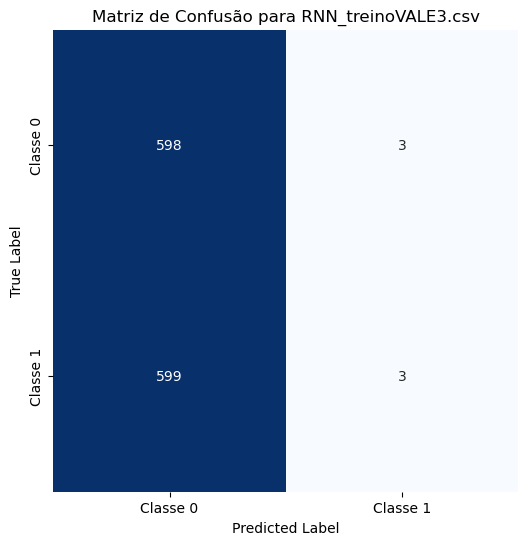

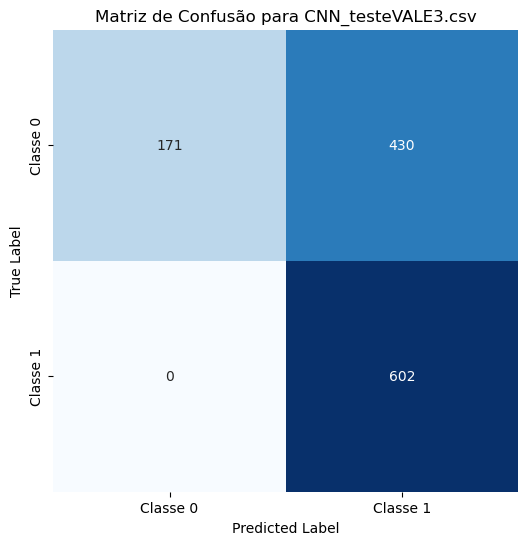

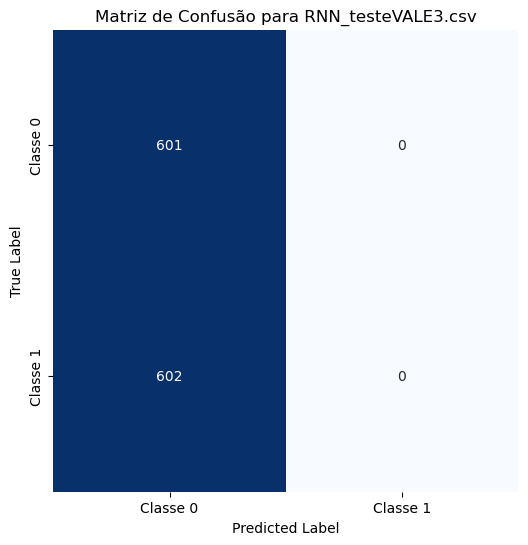

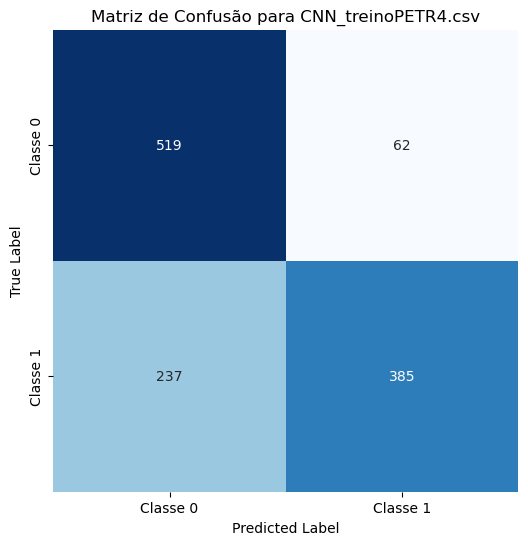

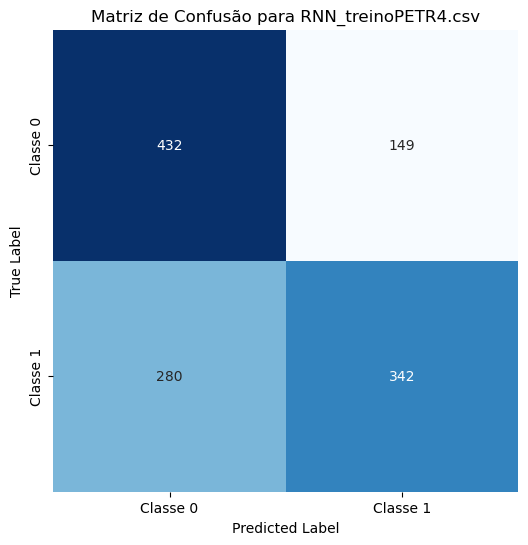

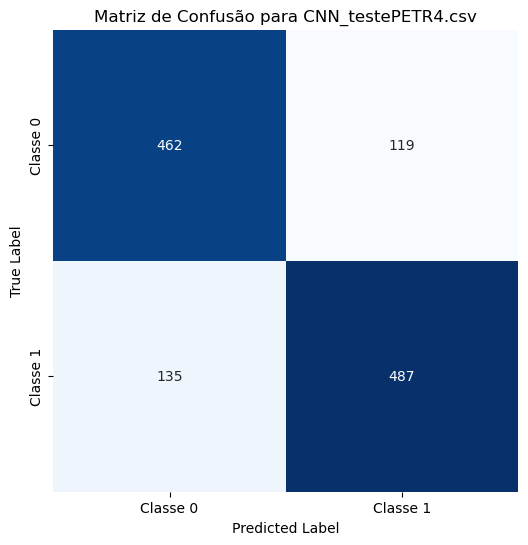

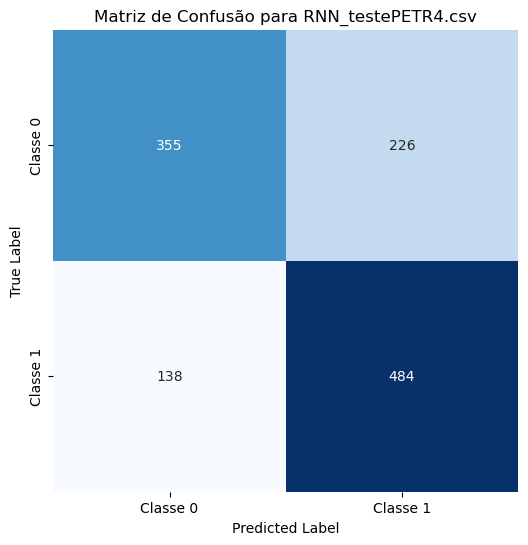

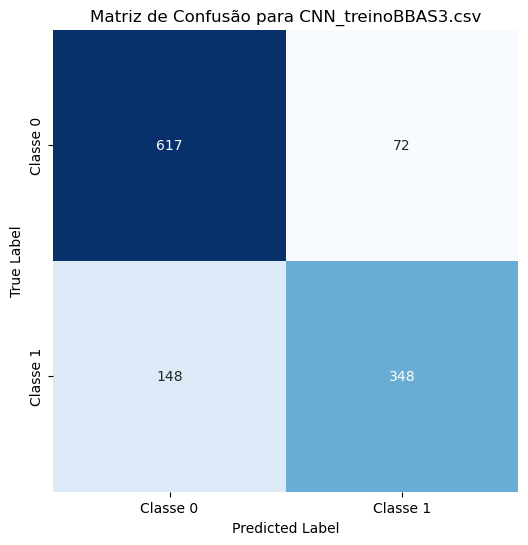

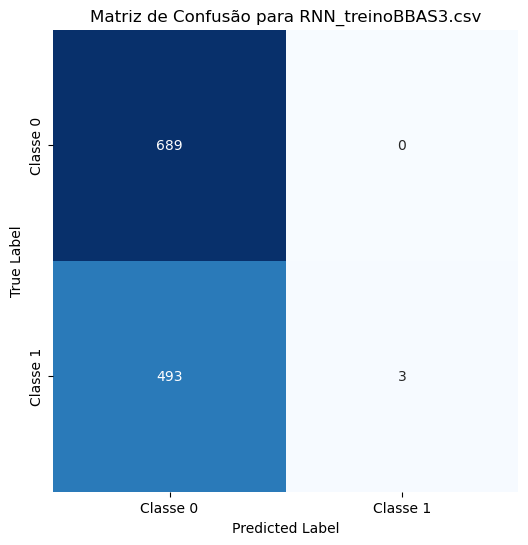

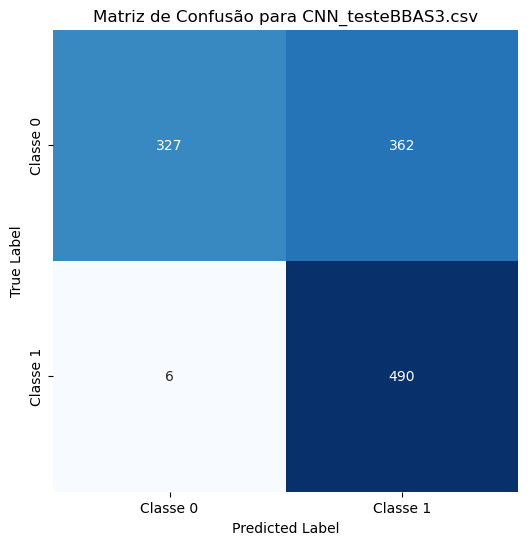

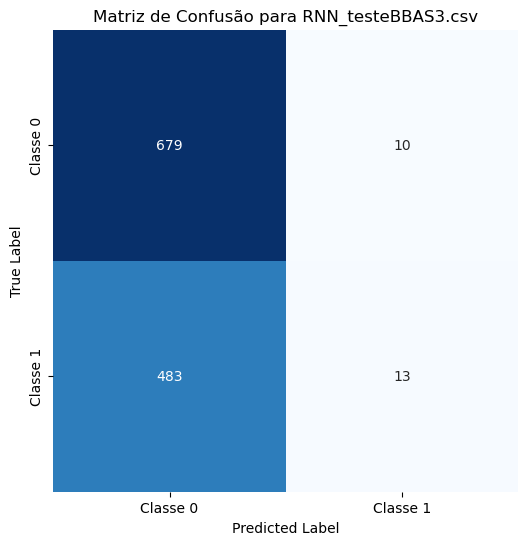

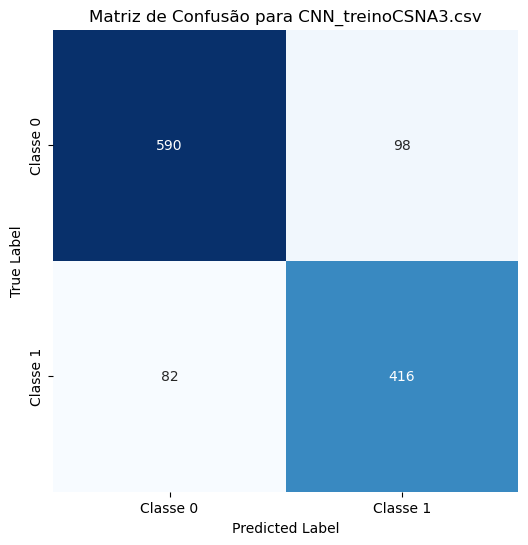

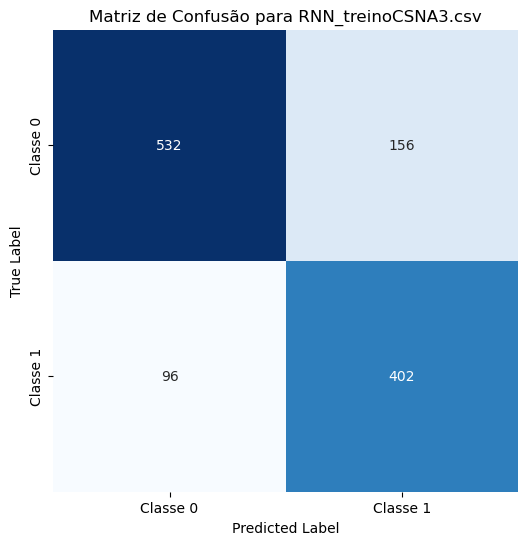

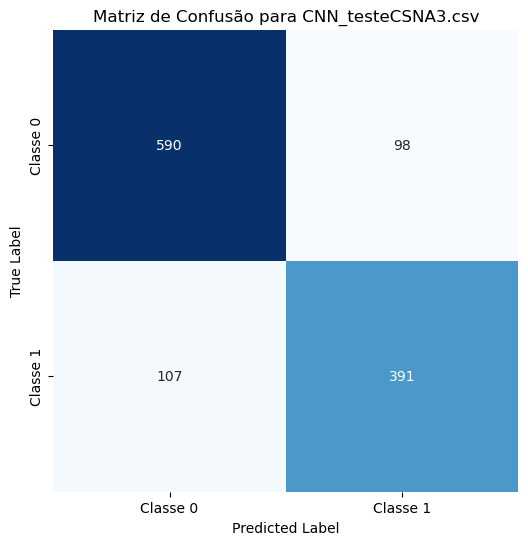

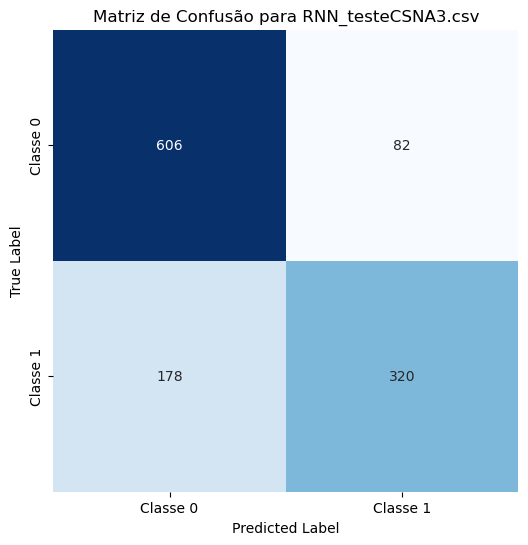

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Função para plotar a matriz de confusão
def plotar_matriz_confusao(cm, classes, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

# Avaliar cada modelo e imprimir as métricas
for chave, modelo in modelos.items():
    # Corrigir o nome da chave para corresponder aos nomes dos arquivos de teste no dicionário
    # Remover prefixo do modelo (CNN_ ou RNN_) e substituir "treino" por "teste" para formar a chave correta do teste
    nome_base = chave.split('_', 1)[1]  # Remove 'CNN_' ou 'RNN_'
    nome_teste = nome_base.replace("treino", "teste")

    if nome_teste in dfs_processados:
        df_teste = dfs_processados[nome_teste]
        X_teste = df_teste.drop(['Date', 'Close', 'Smoothed_Close', 'Label'], axis=1)
        y_teste = df_teste['Label']

        # Normalizar os dados de teste
        X_teste = scaler.transform(X_teste)
        X_teste = np.expand_dims(X_teste, axis=2)

        # Converter os rótulos de teste para formato categórico
        y_teste_cat = converter_para_categorico(y_teste)

        # Avaliar o modelo
        scores = modelo.evaluate(X_teste, y_teste_cat, verbose=0)
        print(f"{chave} -> Acurácia: {scores[1]*100:.2f}%")

        # Predições
        y_pred = modelo.predict(X_teste)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_teste_classes = np.argmax(y_teste_cat, axis=1)

        # Gerar e plotar a matriz de confusão
        cm = confusion_matrix(y_teste_classes, y_pred_classes)
        plotar_matriz_confusao(cm, classes=['Classe 0', 'Classe 1'], title=f'Matriz de Confusão para {chave}')

        # Gerar relatório de classificação
        print(f"Relatório de Classificação para {chave}:\n {classification_report(y_teste_classes, y_pred_classes)}\n")
    else:
        print(f"Dados de teste não encontrados para {nome_teste}")


## Análise dos Resultados de Deep Learning para Classificação de Ações

**CNN em Treino (VALE3, PETR4, BBAS3, CSNA3):**
- **VALE3:** Acurácia de 75.81%, alta precisão na Classe 1, porém recall moderado - indica tendência a falsos negativos.
- **PETR4:** Acurácia ligeiramente superior de 76.72%, melhor equilíbrio entre precisão e recall.
- **BBAS3 e CSNA3:** Acurácias de 74.18% e 84.74%, com CSNA3 exibindo excelentes métricas balanceadas.

**RNN em Treino (VALE3, PETR4, BBAS3, CSNA3):**
- **VALE3 e BBAS3:** Acurácias baixas de 50.12% e 58.14%, problemas notáveis no recall para a Classe 1.
- **PETR4 e CSNA3:** Melhores desempenhos com 70.91% e 79.93%, mas ainda abaixo das CNNs.

**CNN em Teste (VALE3, PETR4, BBAS3, CSNA3):**
- **VALE3:** Acurácia de 63.09% no teste, com dificuldades na generalização, principalmente para a Classe 0.
- **PETR4:** Acurácia de 73.07%, alguma capacidade de generalização observada.
- **BBAS3 e CSNA3:** Acurácias de teste impressionantes de 79.58% e 82.97%, respectivamente.

**RNN em Teste (VALE3, PETR4, BBAS3, CSNA3):**
- **VALE3:** Acurácia de teste de apenas 49.96%, mostrando dificuldades significativas de generalização.
- **PETR4, BBAS3 e CSNA3:** Acurácias de teste de 57.44%, 58.73% e 79.76%, com CSNA3 apresentando o melhor resultado.

**Por que a CNN foi superior?**
CNNs foram capazes de capturar padrões temporais e espaciais de forma eficaz nas séries temporais dos preços das ações, algo crítico para a previsão no mercado financeiro.

**Melhorias para aumentar a acurácia:**
1. **Data Augmentation:** Utilizar dados sintéticos para expandir o conjunto de treino e melhorar a capacidade de generalização.
2. **Hyperparameter Tuning:** Ajustar os hiperparâmetros para otimizar os modelos.
3. **Ensemble Methods:** Aplicar combinações de modelos ou métodos de ensemble para capturar uma variedade maior de padrões nos dados.


## Análise dos Resultados e Matrizes de Confusão

### CNN:
- **Treino VALE3:** Alta taxa de verdadeiros positivos para a Classe 1, mas com uma tendência notável para falsos positivos, sugerindo uma possível melhoria no balanceamento de classes ou na penalização de erros para a Classe 0.
- **Teste VALE3:** Perfeição na previsão da Classe 0, mas com alta ocorrência de falsos negativos, indicando que o modelo pode estar enviesado para a Classe 1 em cenários de teste.

### RNN:
- **Treino VALE3:** Distribuição desigual, favorecendo fortemente a Classe 0 sobre a Classe 1, revelando um modelo com viés extremo e dificuldade em identificar a Classe 1.
- **Teste VALE3:** Persistência do viés para a Classe 0 em teste, refletindo deficiências significativas no aprendizado e captura da sequencialidade dos dados.

### Considerações para Melhoria:
1. **Rebalanceamento de Classes:** A aplicação de técnicas de rebalanceamento como SMOTE ou a ponderação de classes durante o treinamento pode corrigir o viés do modelo.
2. **Ajuste de Limiares:** Modificar os limiares de decisão do modelo poderia ajudar a equilibrar a sensibilidade às classes previstas.
3. **Revisão da Arquitetura do Modelo:** Particularmente para RNNs, uma revisão na arquitetura pode ser necessária para melhorar a captura das dependências temporais dos dados.

Estas melhorias têm o potencial de aprimorar significativamente a acurácia e a generalização dos modelos para futuras previsões de mercado.
